# Estrategía 1
## Escoger solo una caracteristica

- En esta estrategia, lo que intento realizar, es entrenar y evaluar el clasificador con cada caracteristica.
- La caracteristica que menor errores a la hora de evaluarla nos de, es la de mejor exactitud.

In [1]:
# Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # Importa el modelo de clasificación
from sklearn.cross_validation import train_test_split # Importa las funciones de validación cruzada
from sklearn.preprocessing import StandardScaler # Importa las funciones de preprocesamineto

#Importamos la base de datos
from sklearn import datasets
cancer = datasets.load_breast_cancer()

C:\Users\RanKey\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Seleccionamos todas las muestras con todas sus caracteristicas (30)
datos = cancer.data[:, :30]
# También seleccionamos las muestras que tienen quienes cuales tiene cancer y cuales no
y = cancer.target

In [3]:
# Creamos un entero con el numero de caracteristicas de los datos
caracteristicas = np.shape(datos)[1]
# En esta lista de 30*4 guardaremos:
    # 30 resultados (1 por cada caracteristica)
    # Primera fila tendrá la cantidad de datos mal clasificados
    # Segunda tendrá la exactitud de cada caracteristica
    # Tercera contenerá la el nombre de la caracteristica
    # Cuarta guardará las iniciales del nombre de la caracteristica
clasificadas = [[0] * 4 for i in range(caracteristicas)]

In [4]:
# A esta función se le pasa una cadena de caracteres y esta saca la primera letra
    # de la palabra(s), es como una especie de abreviatura para la gráfica
def first_letter(line):
    words = line.split()
    letters = [word[0] for word in words]
    return ("".join(letters))

In [5]:
# Con esta función podemos gráficar, solo con pasarle la lista en la que están
    # los datos, despues de pasar por el clasificador
def graph(clasificadas):
    # Ordenamos los datos de menor a mayor, basandonos solo en la primera columna
    clasificadas.sort(key=lambda x: x[1], reverse=True)
    # Guardamos las caracteristicas y los errores para gráficarlos
    caracteristica = [row[3] for row in clasificadas]
    errores = [row[0] for row in clasificadas]
    # Guardamos las posiciones de 0 a 30 en un vector
    x_pos = np.arange(len(caracteristica))
    
    # Cálculamos la pendiente y el intercepto para cálcular la línea de tendencia
    pendiente, intercepto = np.polyfit(x_pos, errores, 1)
    linea_tendencia = intercepto + (pendiente * x_pos)
    
    # Le damos el tamaño a la gráfica y agregamos los valores para esta
    plt.figure(figsize=(10,8))
    plt.plot(x_pos, linea_tendencia, color='red', linestyle='--')    
    plt.bar(x_pos, errores, align='center')
    plt.xticks(x_pos, caracteristica) 
    plt.ylabel('Errores')
    plt.xlabel('Caracteristicas')
    plt.show()

In [6]:
# Esta es al función de la magia, le pasamos los datos y recorremos caracteristica
    # por caracteristica, buscando la que mejor clasifique los datos (Menor error)
def target(X):
    for i in range(caracteristicas):
        # Obtenemos la columna que vamos a evaluar y la pasamos al clasificador
        selector = [x for x in range(X.shape[1]) if x == i]
        x = X[:,selector]
        
        # Hacemos la división del conjunto de entrenamiento y el conjunto de validación
        X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
        
        # Estándarizamos los datos
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_norm = sc.transform(X_train)
        X_test_norm = sc.transform(X_test)
        
        # Ahora entrenamos el clasificador
        clasificador = LogisticRegression(C=1, random_state=0) # C es el parámetro de regularización
        clasificador.fit(X_train_norm, y_train) # Entrenamiento del clasificador
        
        #Para validar el clasificador
        y_pred = clasificador.predict(X_test_norm)
        correct = (y_pred - y_test) == 0
        # Cálculamos la exactitud del clasificador (accurrancy)
        acc = sum(correct) / y_test.size
        # En la primera columna, la cantidad de errores
        clasificadas[i][0] = (y_test != y_pred).sum()
        # La exactitud y con la función format, le decimos que solo guarde los 3 decimales
        clasificadas[i][1] = format(acc, '.3f')
        # Los nombres de las caracteristicas
        clasificadas[i][2] = list(cancer.feature_names)[i]
        # Las primeras letras de cada palabra
        clasificadas[i][3] = first_letter(list(cancer.feature_names)[i])

[8, '0.953', 'worst radius', 'wr']
[9, '0.947', 'worst perimeter', 'wp']
[9, '0.947', 'worst area', 'wa']
[15, '0.912', 'mean perimeter', 'mp']
[15, '0.912', 'mean area', 'ma']
[17, '0.901', 'mean radius', 'mr']
[18, '0.895', 'mean concave points', 'mcp']
[19, '0.889', 'worst concave points', 'wcp']
[23, '0.865', 'mean concavity', 'mc']
[23, '0.865', 'area error', 'ae']
[25, '0.854', 'worst concavity', 'wc']
[34, '0.801', 'radius error', 're']
[37, '0.784', 'mean compactness', 'mc']
[39, '0.772', 'perimeter error', 'pe']
[40, '0.766', 'worst compactness', 'wc']
[46, '0.731', 'mean texture', 'mt']
[47, '0.725', 'worst symmetry', 'ws']
[48, '0.719', 'worst texture', 'wt']
[48, '0.719', 'worst smoothness', 'ws']
[49, '0.713', 'concave points error', 'cpe']
[52, '0.696', 'mean smoothness', 'ms']
[52, '0.696', 'worst fractal dimension', 'wfd']
[54, '0.684', 'concavity error', 'ce']
[56, '0.673', 'mean symmetry', 'ms']
[60, '0.649', 'compactness error', 'ce']
[63, '0.632', 'mean fractal dime

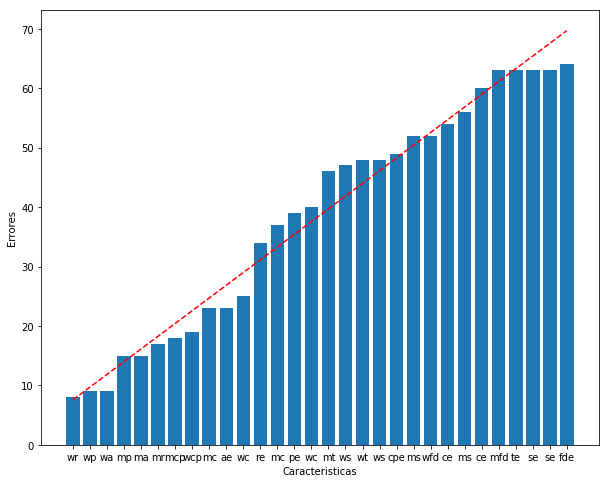

In [12]:
#Ejecutamos todas las funciones        
target(datos)
organizados = sorted(clasificadas, key=lambda k: k[0])
print(*organizados, sep='\n')
graph(clasificadas)